# Auto ARIMA with stock price predictions

**Using everything you learnt in the previous session with `auto_arima()` function, apply automated ARIMA to the stock price dataset. Remember that you need to isolate the time series to a single company, e.g. GOOG for Google.**

**NOTE: Stock prices are recorded on trading days, not business days, which means there is no specific period available that can be implemented. For this reason, do not look for seasonal component, and expect warning messages when plotting test predictions against the original test set. The indices will not match up.**

In [1]:
import pmdarima as pm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('data/sp500sub.csv', index_col='Date', parse_dates=True)

In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2010-01-04,9.22,9.51,9.17,9.50,9.50,1865400.0,INCY
2010-01-05,9.51,10.29,9.45,10.27,10.27,7608900.0,INCY
2010-01-06,10.38,11.09,10.35,11.00,11.00,8046700.0,INCY
2010-01-07,11.00,11.06,10.62,10.82,10.82,3680300.0,INCY
2010-01-08,10.82,11.00,10.75,10.94,10.94,1529300.0,INCY


In [4]:
df.shape

(225077, 7)

## Build non-seasonal Auto ARIMA model for Google close prices

In [86]:
goog = df[df['Name'] == 'GOOG']['Close']

In [87]:
goog_log = np.log(df[df['Name'] == 'GOOG']['Close'])

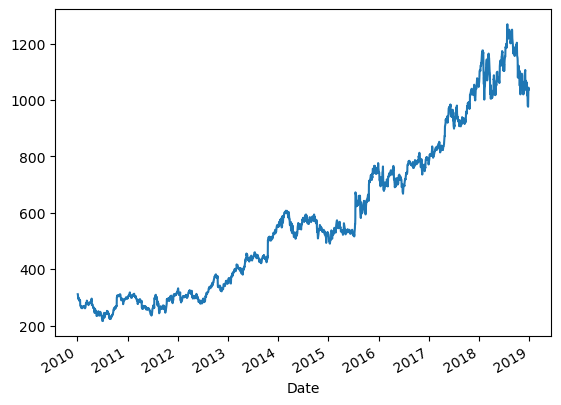

In [88]:
goog.plot();

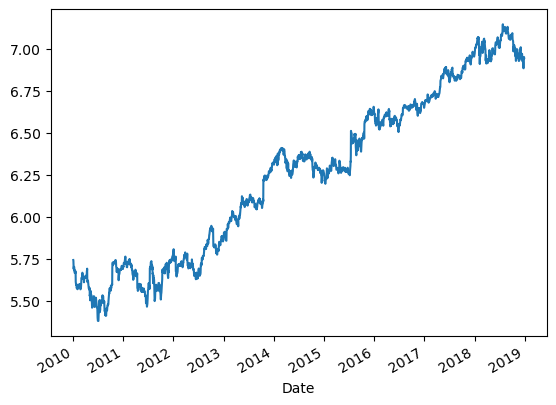

In [89]:
goog_log.plot();

**The log-transformed data is less erratic, but both plots show a steady increase so there is a linear trend, but no obvious evidence of seasonality, which is not common in stock prices anyway.**

In [90]:
# Create training and test sets with raw data

N_test = 30

train = goog.iloc[: -N_test]
test = goog.iloc[-N_test :]

**Build an auto ARIMA model with default parameter settings, to see how auto ARIMA handles the time series. However, make sure to ignore errors when unable to fit a ARIMA model.**

**NOTE: For large datasets, it can improve performance to set a lower limit to the number of iterations for the function with `maxiter` parameter. It is a trade-off between speed and robustness. Setting a lower limit speeds up the evaluation.**

In [91]:
model = pm.auto_arima(train, 
                      error_action='ignore', 
                      trace=True, 
                      suppress_warnings=True,  
                      seasonal=False)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=16241.681, Time=2.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=16270.383, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=16269.726, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=16269.492, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=16271.123, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=16268.065, Time=0.90 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=16267.873, Time=0.74 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=16241.201, Time=2.22 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=16266.968, Time=0.38 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=16243.211, Time=2.85 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=16244.848, Time=2.54 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=16241.203, Time=2.34 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=16255.943, Time=1.49 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=16242.450, Time=2.81 sec
 ARIMA(3,1,2)(0,0,0

In [92]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2233
Model:               SARIMAX(3, 1, 2)   Log Likelihood               -8113.601
Date:                Wed, 06 Sep 2023   AIC                          16241.201
Time:                        09:36:35   BIC                          16281.176
Sample:                             0   HQIC                         16255.798
                               - 2233                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.7607      0.520      1.463      0.144      -0.259       1.780
ar.L1         -0.6622      0.026    -25.096      0.000      -0.714      -0.611
ar.L2         -0.9252      0.019    -48.600      0.000      -0.962      -0.888
ar.L3          0.0415      0.015      2.768      0.006       0.012       0.071
ma.L1          0.7065      0.022     32.581      0.000       0.664       0.749
ma.L2          0.9186      0.020     45.403      0.000       0.879       0.958
sigma2        84.6837      1.062     79.753      0.000      82.603      86.765
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             11381.42
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               6.60   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [93]:
# See model parameters to retrieve differencing order 

model.get_params()

{'maxiter': 50,
 'method': 'lbfgs',
 'order': (3, 1, 2),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': {},
 'seasonal_order': (0, 0, 0, 0),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': True}

In [94]:
model.get_params()['order'][1]

1

**With default settings in place, i.e. maximum `p` order and `q` order allowed are 5, the best ARIMA model order is `(3, 1, 2)`, i.e. AR(3) and MA(2) components with one differencing of the raw data. This means that the past three days of data and past two days of errors are used in predicting the next return. The differencing order (1) makes sense since stock prices can be pretty stationary and it is expected that values next to each other are related.**

**You need the differencing order to know the start of training set when making in-sample predictions. If the time series is differenced once, the first value becomes null.**

In [95]:
# Function to plot full data predictions and confidence interval

def plot_result(model, fulldata, train, test):
    params = model.get_params() 
    d = params['order'][1] 
    
    train_pred = model.predict_in_sample(start=d, end=-1) 
    test_pred, confint = model.predict(n_periods=N_test, return_conf_int=True) 
    test_index = test.index.copy()
    test_pred = test_pred.set_axis(test_index)
    
    fig, ax = plt.subplots(figsize=(10, 5)) 
    ax.plot(fulldata.index, fulldata, label='data') 
    ax.plot(train.index[d:], train_pred, label='fitted') 
    ax.plot(test.index, test_pred, label='forecast') 
    ax.fill_between(test.index, confint[:, 0], confint[:, 1], color='red', alpha=0.3) 
    ax.legend();

C:\Users\shmel\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\shmel\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


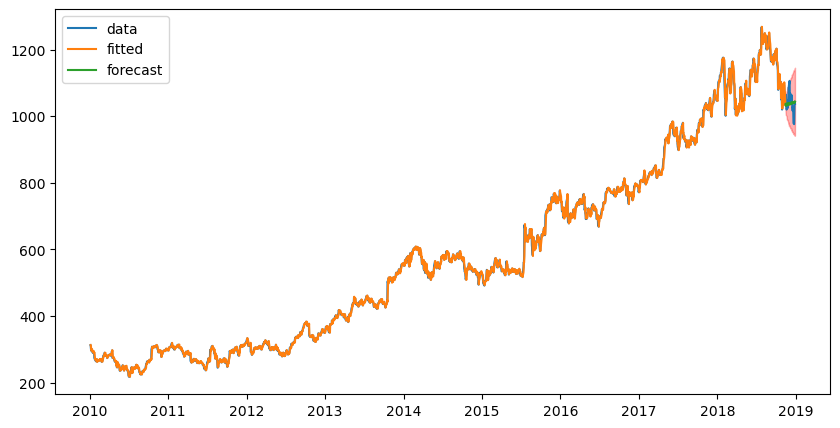

In [96]:
# Error message generated during prediction - cannot remove message but can edit index after predictions

plot_result(model, goog, train, test)

In [97]:
# Function to plot test predictions only

def plot_test(model, test):
    test_pred, confint = model.predict(n_periods=N_test, return_conf_int=True) 
    test_index = test.index.copy()
    test_pred = test_pred.set_axis(test_index)
    
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(test.index, test, label='true')
    ax.plot(test.index, test_pred, label='forecast')
    ax.fill_between(test.index, confint[:,0], confint[:,1], color='red', alpha=0.3)
    ax.legend();

C:\Users\shmel\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\shmel\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


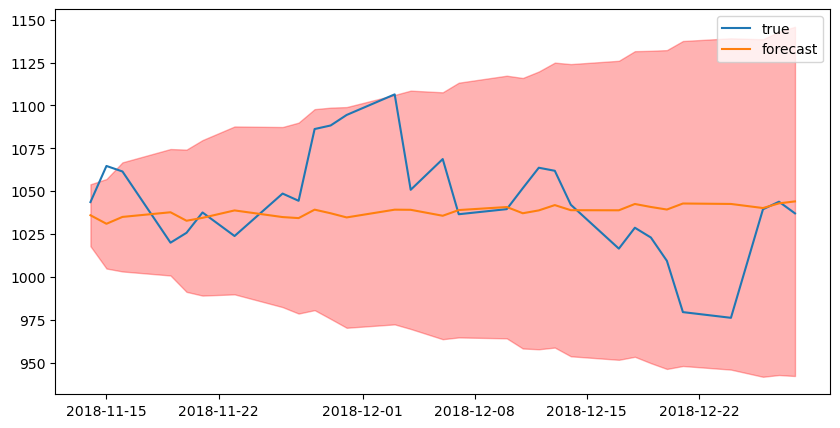

In [98]:
plot_test(model, test)

**The forecast is not that good, although it captures the mean quite well. In addition, the actual prices stay within the confidence bounds, for the most part.**

**NOTE: Predictions are meant for the last 30 trading days, not business days.**

In [99]:
# Function to calculate RMSE

def rmse(y, t):
    return np.sqrt(np.mean((t - y) ** 2))

In [100]:
# Generating training and test predictions raises warning about index in test predictions

test_pred = model.predict(n_periods=N_test, return_conf_int=False)
train_pred = model.predict_in_sample(start=3, end=-1) 

C:\Users\shmel\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\shmel\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [102]:
test_pred[0:5]

2233    1035.987191
2234    1031.015039
2235    1035.019422
2236    1037.725746
2237    1032.783014
dtype: float64

In [103]:
test_index = test.index.copy()

In [104]:
test_pred_index = test_pred.set_axis(test_index)

In [106]:
print("Test RMSE:", rmse(test_pred_index, test))
print("Train RMSE:", rmse(train_pred, train[3:]))
print("RMSE Naive:", rmse(train.iloc[-1], test))

Test RMSE: 30.83334487225334
Train RMSE: 9.174312415144133
RMSE Naive: 30.029502477261467


**Note that the naive forecasting performs better than the ARIMA model!. Regardless of the work done to train the auto ARIMA model, using naive forecasting would get better results.**

## Build non-seasonal auto ARIMA model for Apple close prices

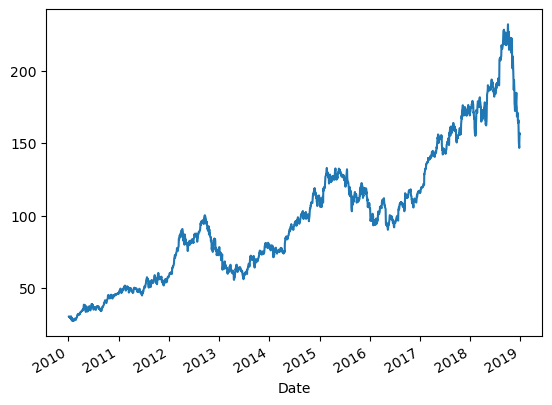

In [50]:
aapl = df[df['Name'] == 'AAPL']['Close']

aapl.plot();

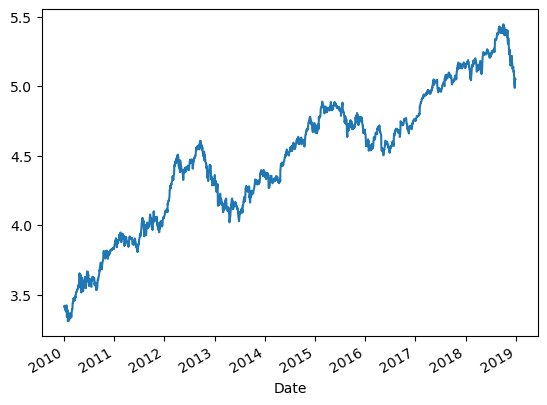

In [51]:
aapl_log = np.log(df[df['Name'] == 'AAPL']['Close'])

aapl_log.plot();

**Note that, compared to Google's returns, Apple has a bigger dip in stock value 2016-17. Can the ARIMA model deal with such an anomalous event? Time series models depend on patterns in the data, and this is not a pattern.**

In [52]:
# Create training and test sets

train = aapl.iloc[: -N_test]
test = aapl.iloc[-N_test :]

In [53]:
model = pm.auto_arima(train, 
                      error_action='ignore', 
                      trace=True, 
                      suppress_warnings=True, 
                      maxiter=30, 
                      seasonal=False)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=8570.033, Time=1.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8575.329, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8574.709, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8574.392, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8577.622, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=8571.650, Time=0.34 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=8570.853, Time=0.64 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=8562.860, Time=1.64 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=8570.672, Time=1.35 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=8572.624, Time=0.74 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=8572.503, Time=1.51 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=8569.377, Time=1.37 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=8570.617, Time=0.88 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=8559.257, Time=1.81 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept

In [54]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2233
Model:               SARIMAX(4, 1, 4)   Log Likelihood               -4269.452
Date:                Wed, 06 Sep 2023   AIC                           8558.904
Time:                        08:38:19   BIC                           8616.011
Sample:                             0   HQIC                          8579.756
                               - 2233                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2173      0.115      1.883      0.060      -0.009       0.444
ar.L1         -0.4756      0.098     -4.832      0.000      -0.668      -0.283
ar.L2         -0.7270      0.116     -6.265      0.000      -0.954      -0.500
ar.L3         -0.3144      0.111     -2.831      0.005      -0.532      -0.097
ar.L4         -0.7649      0.086     -8.868      0.000      -0.934      -0.596
ma.L1          0.5079      0.102      4.978      0.000       0.308       0.708
ma.L2          0.6999      0.124      5.625      0.000       0.456       0.944
ma.L3          0.2672      0.122      2.197      0.028       0.029       0.506
ma.L4          0.7597      0.096      7.934      0.000       0.572       0.947
sigma2         2.6742      0.041     64.534      0.000       2.593       2.755
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):              5737.95
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               4.20   Skew:                            -0.38
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**Contrary to Google, the best ARIMA model for Apple stocks is order of `(4, 1, 4)`. This means well-balanced AR(4) and MA(4) components with one differencing of values.**

C:\Users\shmel\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\shmel\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


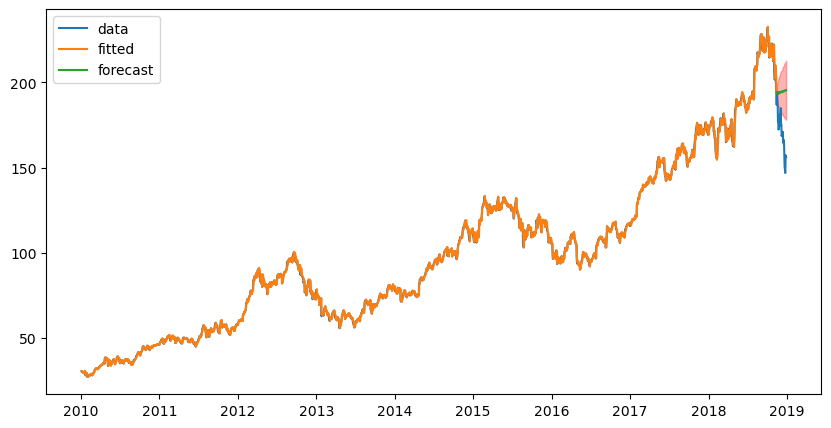

In [55]:
plot_result(model, aapl, train, test)

C:\Users\shmel\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\shmel\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


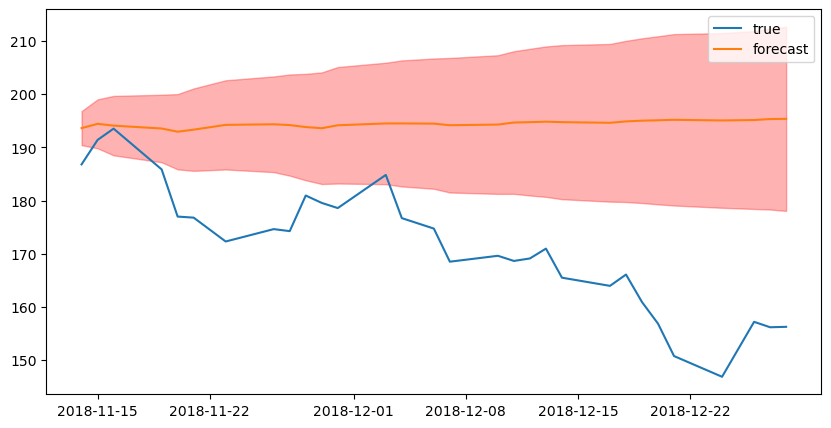

In [56]:
plot_test(model, test)

**This model is quite different from the Google model. The true data is way outside the confidence bounds, except for the first few days, but the model wants to continue on an upwards trend apparently. In terms of machine-learning, this makes sense, but it cannot capture this particular data.**

In [59]:
test_pred = model.predict(n_periods=N_test, return_conf_int=False)
train_pred = model.predict_in_sample(start=4, end=-1) 

C:\Users\shmel\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\shmel\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [60]:
test_pred = test_pred.set_axis(test_index)

In [63]:
print("Test RMSE:", rmse(test_pred, test))
print("Train RMSE:", rmse(train_pred, train[4:]))
print("RMSE Naive:", rmse(train.iloc[-1], test))

Test RMSE: 26.186873491168797
Train RMSE: 1.6396635290242099


**Again, naive forecasting performs better than ARIMA.**

## Build non-seasonal auto ARIMA model for IBM close prices

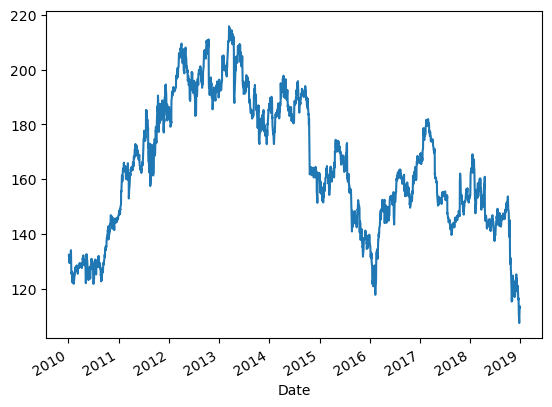

In [64]:
ibm = df[df['Name'] == 'IBM']['Close']

ibm.plot();

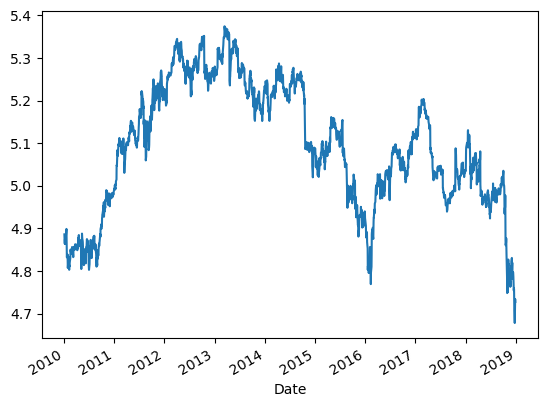

In [65]:
ibm_log = np.log(df[df['Name'] == 'IBM']['Close'])

ibm_log.plot();

**As you can see, the IBM stock prices are shaped completely different from Google or Apple, with more peaks and troughs. This looks even more unpredictable...**

In [66]:
train = ibm.iloc[: -N_test]
test = ibm.iloc[-N_test :]

In [67]:
model = pm.auto_arima(train, 
                      error_action='ignore', 
                      trace=True, 
                      suppress_warnings=True, 
                      maxiter=30, 
                      seasonal=False)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=9439.403, Time=1.26 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=9436.082, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=9437.603, Time=0.19 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=9437.589, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=9434.097, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=9439.454, Time=0.53 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 2.310 seconds


In [68]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2233
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -4716.049
Date:                Wed, 06 Sep 2023   AIC                           9434.097
Time:                        08:53:01   BIC                           9439.808
Sample:                             0   HQIC                          9436.183
                               - 2233                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         4.0067      0.055     72.559      0.000       3.898       4.115
===================================================================================
Ljung-Box (L1) (Q):                   0.48   Jarque-Bera (JB):              5352.76
Prob(Q):                              0.49   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                            -0.77
Prob(H) (two-sided):                  0.03   Kurtosis:                        10.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**Very quickly, auto ARIMA determined that neither AutoRegressive or Moving Average methods would work - only one differencing, meaning the model `(0, 1, 0)` is a random walk, where the current value is copied from the previous one. This also means that IBM stock prices are completely unpredictable. Compare naive RMSE value with test RMSE to see how the model predicts, i.e. copy the previous value showing that ARIMA has not been used.**

C:\Users\shmel\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\shmel\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


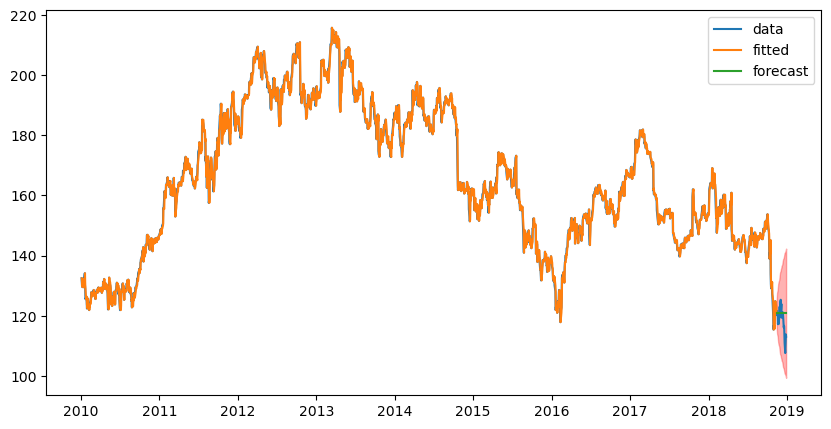

In [69]:
plot_result(model, ibm, train, test)

C:\Users\shmel\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\shmel\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


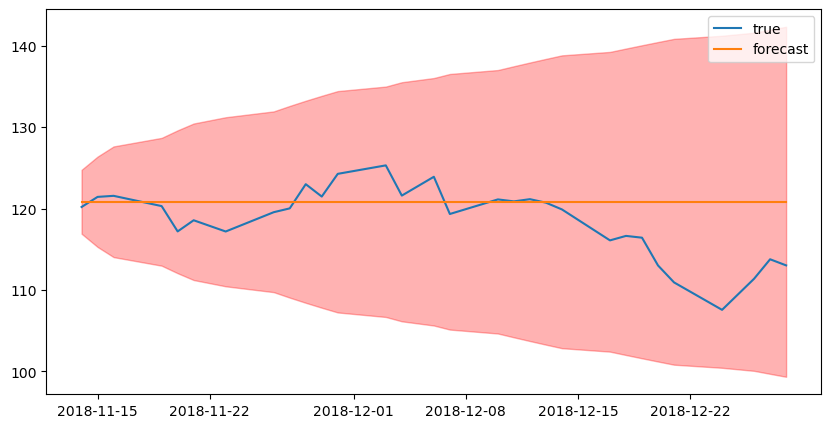

In [70]:
plot_test(model, test)

**At least the true values stay safely within the confidence bounds, so the prediction line is not that bad and crosses the true data multiple times.**

In [73]:
test_pred = model.predict(n_periods=N_test, return_conf_int=False)
train_pred = model.predict_in_sample(start=1, end=-1) 

C:\Users\shmel\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\shmel\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [74]:
test_pred = test_pred.set_axis(test_index)

In [75]:
# No need to generate training predictions

print("RMSE ARIMA:", rmse(test_pred, test))
print("RMSE Naive:", rmse(train.iloc[-1], test))

RMSE ARIMA: 4.763157130051095
RMSE Naive: 4.763157130051095


**Since this is just a random walk taking the last known value, even differencing the data makes no impact on model accuracy from naive forecasting. In fact, they are exactly the same meaning the predictions match perfectly.**

## Build non-seasonal auto ARIMA model for Starbucks close prices

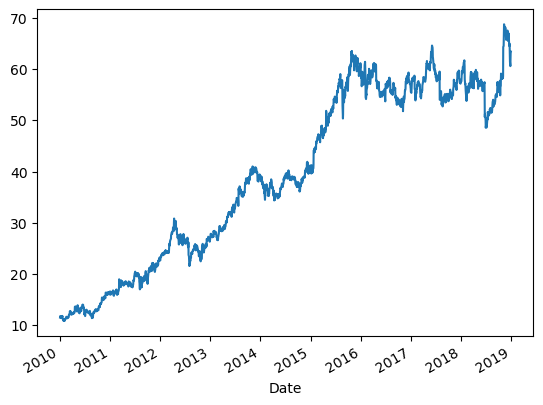

In [76]:
sbux = df[df['Name'] == 'SBUX']['Close']

sbux.plot();

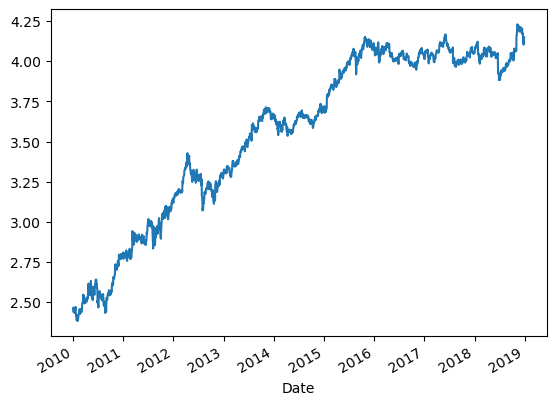

In [77]:
sbux_log = np.log(df[df['Name'] == 'SBUX']['Close'])

sbux_log.plot();

In [78]:
train = sbux.iloc[: -N_test]
test = sbux.iloc[-N_test :]

In [79]:
model = pm.auto_arima(train, 
                      error_action='ignore', 
                      trace=True, 
                      suppress_warnings=True, 
                      maxiter=30, 
                      seasonal=False)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3852.831, Time=1.30 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3851.895, Time=0.30 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3853.862, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3853.860, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3854.154, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3855.861, Time=0.22 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 2.165 seconds


In [80]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2233
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1923.948
Date:                Wed, 06 Sep 2023   AIC                           3851.895
Time:                        08:57:23   BIC                           3863.317
Sample:                             0   HQIC                          3856.066
                               - 2233                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0250      0.012      2.048      0.041       0.001       0.049
sigma2         0.3283      0.003     94.371      0.000       0.321       0.335
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):             18901.16
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               3.80   Skew:                            -0.51
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**Starbucks stock values resemble Google and Apple in distribution but in this case, the random walk is deemed the best model, i.e. naive forecasting, by copying the last known value. However, compared to IBM, this model is a random walk with a 'drift', i.e. an intercept parameter.**

**As with IBM returns, auto ARIMA cannot capture the Starbucks time series with ARIMA components. With only one differencing `(0, 1, 0)`, this model is as good as copying the last known value, i.e. naive forecasting. See the naive RMSE compared to the test RMSE below.**

C:\Users\shmel\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\shmel\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


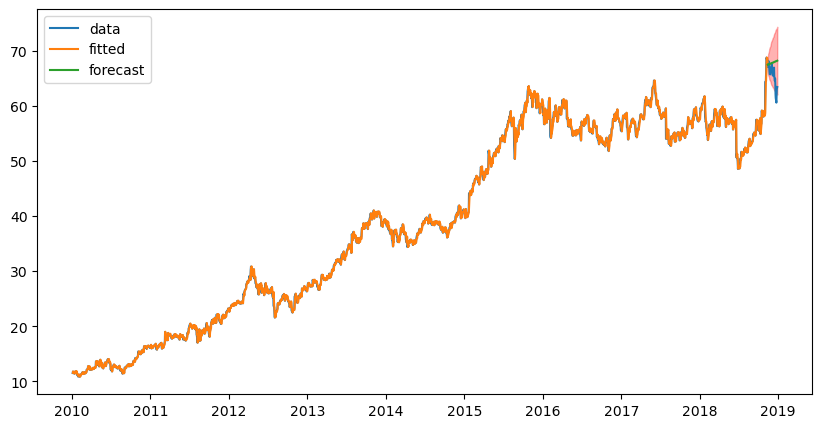

In [81]:
plot_result(model, sbux, train, test)

C:\Users\shmel\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\shmel\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


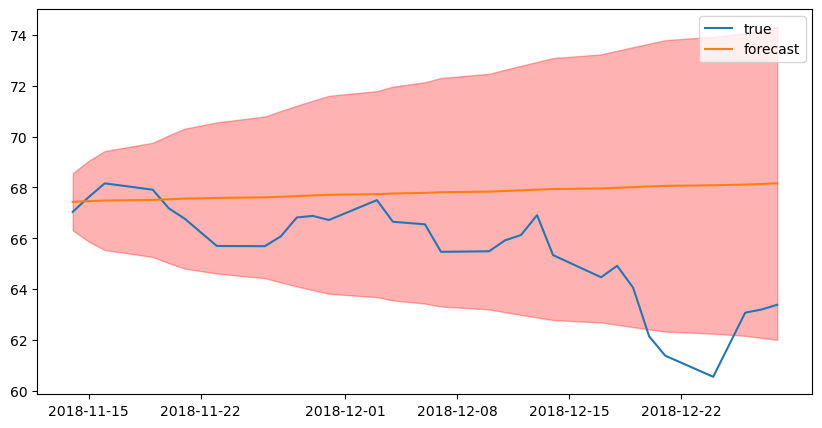

In [82]:
plot_test(model, test)

**This is not too bad, especially at the start, but then the model overestimates the price when the true price drops. Saying that, the true data stays within the confidence bounds until the last week.**

In [83]:
test_pred = model.predict(n_periods=N_test)

C:\Users\shmel\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\shmel\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [84]:
test_pred = test_pred.set_axis(test_index)

In [85]:
print("RMSE ARIMA:", rmse(test_pred, test))
print("RMSE Naive:", rmse(train.iloc[-1], test))

RMSE ARIMA: 3.094903479339405
RMSE Naive: 2.6889385763409135


**The best forecasting method for all stock returns time series is naive forecasting. Using the ARIMA model makes no improvement on the predictive power of simply using the mean or copying the last known value.**

**Do not ignore the negative side of the confidence bounds because it indicates loss in money, and those predictions are totally achievable and will serve you better.** 